In [1]:
import pickle 
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import matplotlib as mpl 

In [2]:
# spec some data 
dataDir = '../data/abs-08/'

# get them data
with open(dataDir + 'temps.pkl', 'rb') as file:
    data = pickle.load(file)
    
df = data['df']
dataTitle = data['title']

# sort... first by requested rates (small first) then by time 
df = df.sort_values(by=['requestedRate', 'time'])

print('title', dataTitle)
df.describe()

title ABS-08


temp           load         rate  requestedRate           time
count  4939.000000    4939.000000  4939.000000    4939.000000    4939.000000
mean    226.882583  236436.681110    10.542608       9.951002   46181.589593
std      39.067801  149151.841703     7.820098       7.348499   30968.589894
min     147.916855   81808.000000    -7.309126       2.000000      45.000000
25%     194.645370  111535.000000     2.433098       2.000000   20318.000000
50%     228.192520  183941.000000    10.558804      10.000000   41566.000000
75%     260.056427  328488.500000    16.055755      15.000000   68804.500000
max     289.397552  693046.000000    27.345077      25.000000  124102.000000

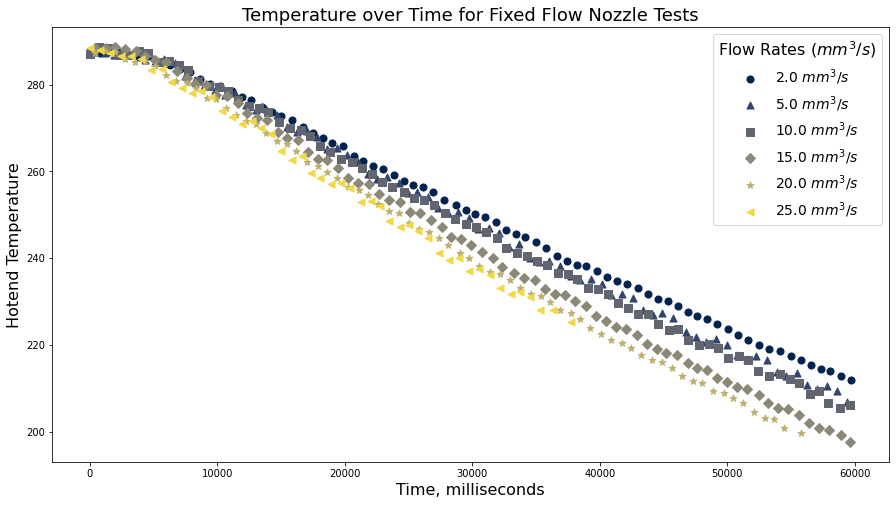

In [3]:
def plotTimeTemp(data):
    # setup size etc 
    plt.rcParams["figure.figsize"] = (12, 4)
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # titles etc 
    plt.title('Temperature over Time for Fixed Flow Nozzle Tests', fontsize=18)
    plt.xlabel('Time, milliseconds', fontsize=16)
    plt.ylabel('Hotend Temperature', fontsize=16)
        
    # get a subset for less-busy points, 
    data = data.iloc[::8]
    
    # clip to 4 seconds of data 
    data = data[data['time'].le(60000)] # & data['time'].ge(10000)]
    
    # markers and colors for colorblind / etc 
    markers = ['o', '^', 's', 'D', '*', '<', '>', 'p', 'H']
    
    # get the colors from 'cividis' colorblind-safe map 
    cividis = mpl.colormaps['cividis']
    
    # set of rates to map colors / symbols 
    rateSet = data['requestedRate'].unique()
    
    for i, rate in enumerate(rateSet):
        subset = data[data['requestedRate'] == rate]
        plt.scatter(subset['time'], subset['temp'], 
                    s=50,
                    marker=markers[i],
                    # we can use a map's "colors" element, which is a list of colors 
                    # w/ len 256... then sample at some step through that; 
                    color=cividis.colors[i * 48],
                    label=f'{rate} $mm^3/s$')
    
    legend1 = plt.legend(title='Flow Rates ($mm^3/s$)', title_fontsize=16, fontsize=14)
    
plotTimeTemp(df)